In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
data = pd.read_csv('plot-data-sphere.csv')
velocity = pd.read_csv('plot-data-velocity.csv')
pos = pd.read_csv('plot-data_position_new.csv')

In [2]:
def load_particle_data(directories):
    for directory in directories:
        dir_str = str(directory)
        globals()[f'par1_{dir_str}'] = np.loadtxt(f'{dir_str}/position_particle_1.txt')
        globals()[f'par1vel_{dir_str}'] = np.loadtxt(f'{dir_str}/velocity_particle_1.txt')

# Usage:
directories = [0, 1, 2, 3, 4, 5]
load_particle_data(directories)

/tmp/ipykernel_823148/1937815195.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(pos['x'],pos[' y'], '-',color ='green',linestyle='dotted', linewidth=4)


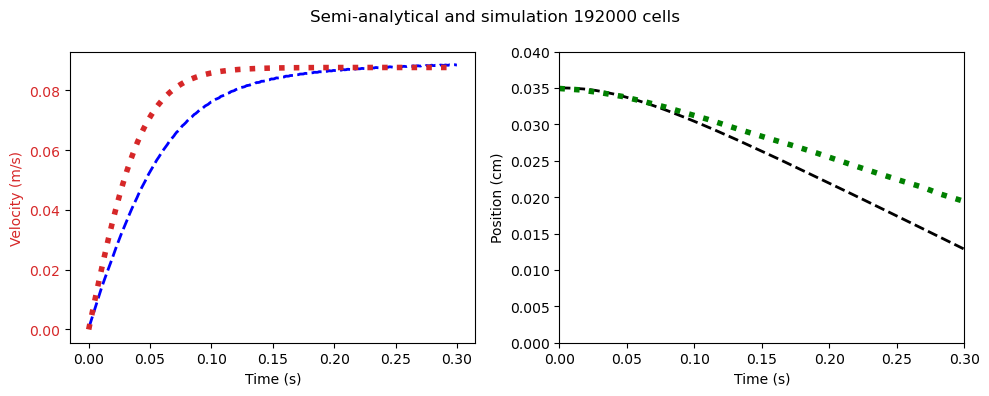

In [3]:
# Given parameters
particle_density = 1250  # kg/m^3
radius = 0.167 / 100  # converting cm to m
g = 9.81  # m/s^2, gravitational acceleration
rho_fluid = 1000  # kg/m^3, fluid density

# Initial conditions
y = 3.5 / 100  # converting cm to m
v = 0.0  # m/s, initial velocity

# Time stepping parameters
dt = 0.001  # time step, seconds
t = 0  # starting time
re_p = 100

# Lists to store the results for plotting
time_list = []
height_list = []
velocity_list = []

# Determine the number of iterations based on the maximum time of 10 seconds
num_iterations = int(0.3 / dt)

for i in range(num_iterations):
    if y <= 0:
        break  # Stop the loop if the sphere hits the ground
    
    # Appending results to lists
    time_list.append(t)
    height_list.append(y)
    velocity_list.append(v)
    
    A = np.pi * radius**2  # Cross-sectional area
    Cd = 1.42  # Drag coefficient for a sphere
    F_d = 0.5 * Cd * rho_fluid * v**2 * A  # Drag force
    m = (4/3) * np.pi * radius**3 * particle_density  # Mass of the sphere
    a = ((particle_density - rho_fluid) / particle_density) * g - (F_d / m)  # acceleration
    v = v + a * dt  # updating velocity
    y = y + v * dt  # updating position
    t = t + dt  # updating time



# Plotting
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Semi-analytical and simulation 192000 cells')
linienstaerke = 2
MarkerGroesse = 8
color = 'tab:red'

#ax1.plot(time_list, np.array(height_list)*100, color=color)
#ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(par1vel_2[:,0][:600], np.sqrt(par1vel_2[:, 1]**2 + par1vel_2[:, 2]**2 + par1vel_2[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(time_list, velocity_list, color=color,linestyle='dotted', linewidth=4)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2.plot(par1_1[:, 0][:700],par1_1[:, 3][:700], '--',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(pos['x'],pos[' y'], '-',color ='green',linestyle='dotted', linewidth=4)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()

plt.show()


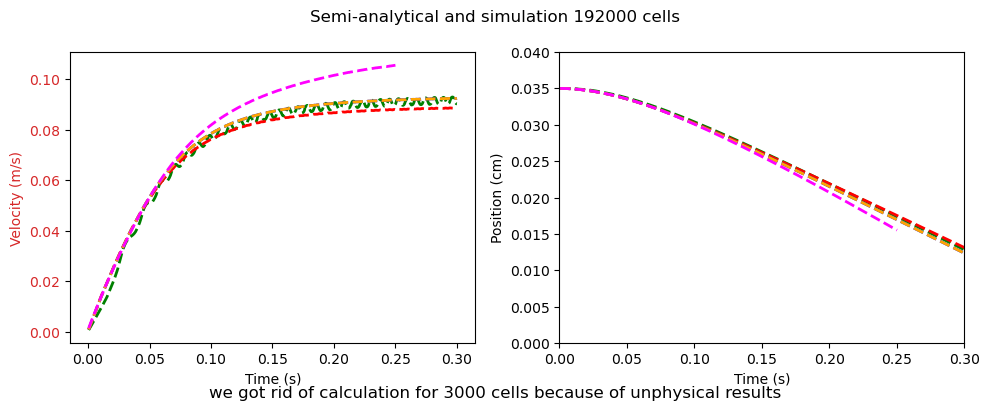

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Semi-analytical and simulation 192000 cells')
linienstaerke = 2
MarkerGroesse = 8
color = 'tab:red'


#ax1.plot(par1vel_0[:,0][:600], np.sqrt(par1vel_0[:, 1]**2 + par1vel_0[:, 2]**2 + par1vel_0[:, 3]**2)[:600], '--',color = 'black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.plot(par1vel_1[:,0][:600], np.sqrt(par1vel_1[:, 1]**2 + par1vel_1[:, 2]**2 + par1vel_1[:, 3]**2)[:600], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_2[:,0][:600], np.sqrt(par1vel_2[:, 1]**2 + par1vel_2[:, 2]**2 + par1vel_2[:, 3]**2)[:600], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_3[:,0][:600], np.sqrt(par1vel_3[:, 1]**2 + par1vel_3[:, 2]**2 + par1vel_3[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_4[:,0][:600], np.sqrt(par1vel_4[:, 1]**2 + par1vel_4[:, 2]**2 + par1vel_4[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_5[:,0][:600], np.sqrt(par1vel_5[:, 1]**2 + par1vel_5[:, 2]**2 + par1vel_5[:, 3]**2)[:600], '--',color = 'magenta',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)


#ax2.plot(par1_0[:, 0][:700],par1_0[:, 3][:700], '--',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.plot(par1_1[:, 0][:700],par1_1[:, 3][:700], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_2[:, 0][:700],par1_2[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_3[:, 0][:700],par1_3[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_4[:, 0][:700],par1_4[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_5[:, 0][:700],par1_5[:, 3][:700], '--',color ='magenta',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
fig.text(0.5, 0.02,'we got rid of calculation for 3000 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()



In [5]:
par1_1_000001 = np.loadtxt('1_000001/position_particle_1.txt')
par1vel_1_000001 = np.loadtxt('1_000001/velocity_particle_1.txt')
par1_1_000005 = np.loadtxt('1_000005/position_particle_1.txt')
par1vel_1_000005 = np.loadtxt('1_000005/velocity_particle_1.txt')
par1_1_00005 = np.loadtxt('1_00005/position_particle_1.txt')
par1vel_1_00005 = np.loadtxt('1_00005/velocity_particle_1.txt')
par1_1_0005 = np.loadtxt('1_0005/position_particle_1.txt')
par1vel_1_0005 = np.loadtxt('1_0005/velocity_particle_1.txt')

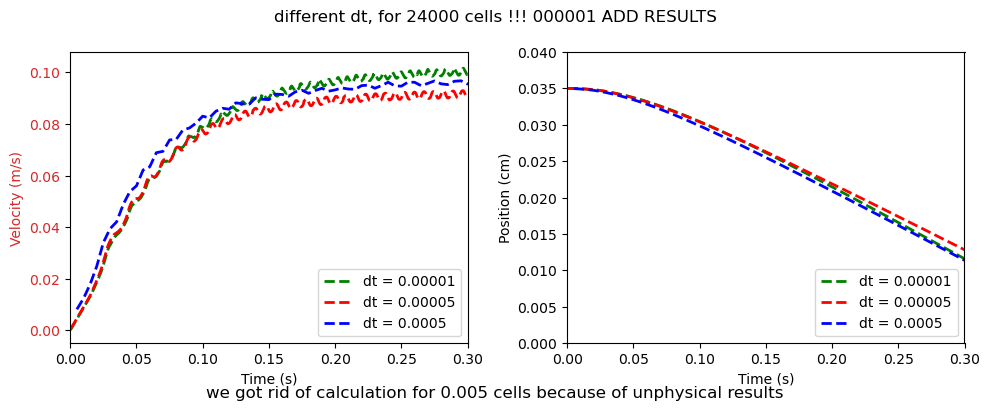

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('different dt, for 24000 cells !!! 000001 ADD RESULTS')
linienstaerke = 2
MarkerGroesse = 8

ax1.plot(par1vel_1_000001[:,0][:], np.sqrt(par1vel_1_000001[:, 1]**2 + par1vel_1_000001[:, 2]**2 + par1vel_1_000001[:, 3]**2)[:], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_1_000005[:,0][:600], np.sqrt(par1vel_1_000005[:, 1]**2 + par1vel_1_000005[:, 2]**2 + par1vel_1_000005[:, 3]**2)[:600], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
ax1.plot(par1vel_1_00005[:,0][:600], np.sqrt(par1vel_1_00005[:, 1]**2 + par1vel_1_00005[:, 2]**2 + par1vel_1_00005[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
#ax1.plot(par1vel_1_0005[:,0][:600], np.sqrt(par1vel_0005[:, 1]**2 + par1vel_0005[:, 2]**2 + par1vel_0005[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.set_xlabel('Time (s)')
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.legend(loc='lower right')
ax1.tick_params(axis='y', labelcolor=color)

ax2.plot(par1_1_000001[:, 0][:],par1_1_000001[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_1_000005[:, 0][:700],par1_1_000005[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
ax2.plot(par1_1_00005[:, 0][:700],par1_1_00005[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
#ax2.plot(par1_0005[:, 0][:700],par1_0005[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.legend(loc='lower right')
fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()



In [28]:
par2_000001 = np.loadtxt('2_000001/position_particle_1.txt')
par2vel_000001 = np.loadtxt('2_000001/velocity_particle_1.txt')
par2_000005 = np.loadtxt('2_000005/position_particle_1.txt')
par2vel_000005 = np.loadtxt('2_000005/velocity_particle_1.txt')
par2_00005 = np.loadtxt('2_00005/position_particle_1.txt')
par2vel_00005 = np.loadtxt('2_00005/velocity_particle_1.txt')
par2_00005_ts_1 = np.loadtxt('2_00005_exchange_time_every_step/position_particle_1.txt')
par2vel_00005_ts_1 = np.loadtxt('2_00005_exchange_time_every_step/velocity_particle_1.txt')
par2_0005 = np.loadtxt('2_0005/position_particle_1.txt')
par2vel_0005 = np.loadtxt('2_0005/velocity_particle_1.txt')

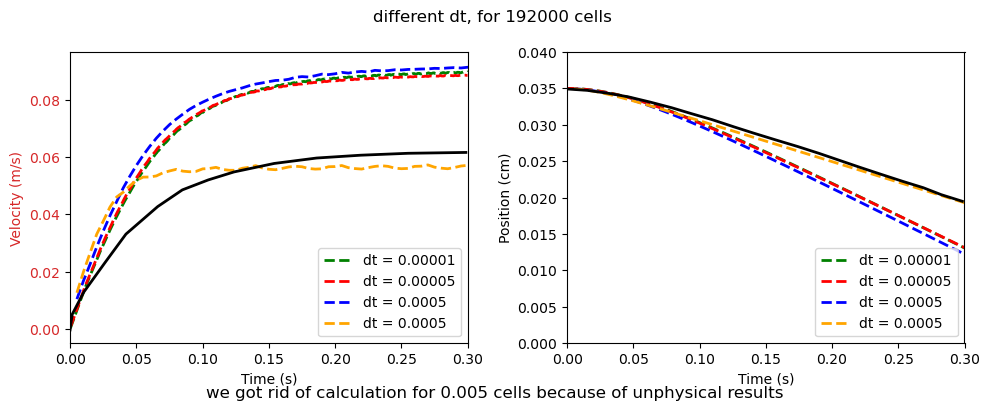

In [40]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('different dt, for 192000 cells ')

ax1.plot(par2vel_000001[:,0][:], np.sqrt(par2vel_000001[:, 1]**2 + par2vel_000001[:, 2]**2 + par2vel_000001[:, 3]**2)[:], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par2vel_000005[:,0][:600], np.sqrt(par2vel_000005[:, 1]**2 + par2vel_000005[:, 2]**2 + par2vel_000005[:, 3]**2)[:600], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
ax1.plot(par2vel_00005[:,0][:600], np.sqrt(par2vel_00005[:, 1]**2 + par2vel_00005[:, 2]**2 + par2vel_00005[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.0005')
ax1.plot(par2vel_00005_ts_1[:,0][:600], np.sqrt(par2vel_00005_ts_1[:, 1]**2 + par2vel_00005_ts_1[:, 2]**2 + par2vel_00005_ts_1[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.0005')
#ax1.plot(par2vel_0005[:,0][:600], np.sqrt(par2vel_0005[:, 1]**2 + par2vel_0005[:, 2]**2 + par2vel_0005[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.005')
ax1.plot(velocity['x'],velocity[' y'],'-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.set_xlabel('Time (s)')
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower right')



ax2.plot(par2_000001[:, 0][:],par2_000001[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par2_000005[:, 0][:700],par2_000005[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
ax2.plot(par2_00005[:, 0][:700],par2_00005[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
ax2.plot(par2_00005_ts_1[:, 0][:700],par2_00005_ts_1[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
#ax2.plot(par1_0005[:, 0][:700],par1_0005[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.plot(pos['x'],pos[' y'], '-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.legend(loc='lower right')
fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

In [9]:
def load_particle_data_timestep(directories):
    for directory in directories:
        dir_str = str(directory)
        globals()[f'par2_ts_{dir_str}'] = np.loadtxt(f'exchange_time/{dir_str}/position_particle_1.txt')
        globals()[f'par2vel_ts_{dir_str}'] = np.loadtxt(f'exchange_time/{dir_str}/velocity_particle_1.txt')

# Usage:
directories = [10, 6, 8]#, 4, 2, 1]
load_particle_data_timestep(directories)

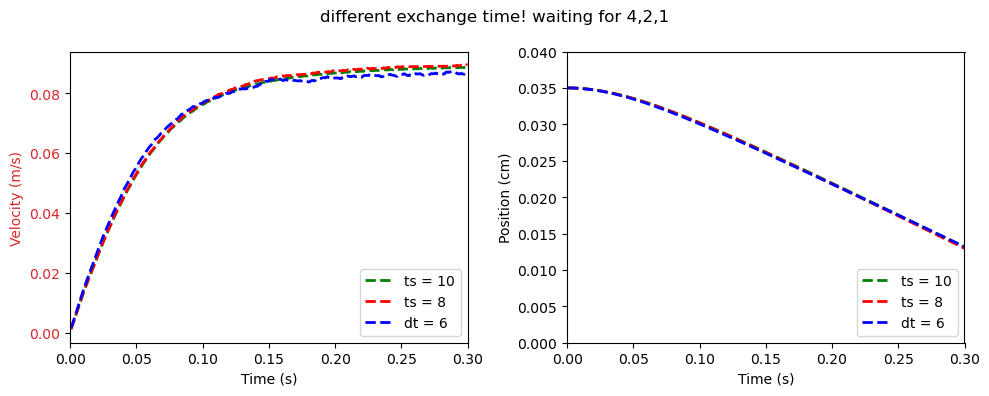

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('different exchange time! waiting for 4,2,1')

ax1.plot(par2vel_ts_10[:,0][:], np.sqrt(par2vel_ts_10[:, 1]**2 + par2vel_ts_10[:, 2]**2 + par2vel_ts_10[:, 3]**2)[:], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax1.plot(par2vel_ts_8[:,0][:600], np.sqrt(par2vel_ts_8[:, 1]**2 + par2vel_ts_8[:, 2]**2 + par2vel_ts_8[:, 3]**2)[:600], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax1.plot(par2vel_ts_6[:,0][:600], np.sqrt(par2vel_ts_6[:, 1]**2 + par2vel_ts_6[:, 2]**2 + par2vel_ts_6[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 6')
#ax1.plot(par2vel_ts_4[:,0][:600], np.sqrt(par2vel_ts_4[:, 1]**2 + par2vel_ts_4[:, 2]**2 + par2vel_ts_4[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 4')
#ax1.plot(par2vel_ts_2[:,0][:600], np.sqrt(par2vel_ts_2[:, 1]**2 + par2vel_ts_2[:, 2]**2 + par2vel_ts_2[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 2')   
#ax1.plot(par2vel_ts_1[:,0][:600], np.sqrt(par2vel_ts_1[:, 1]**2 + par2vel_ts_1[:, 2]**2 + par2vel_ts_1[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 1')
ax1.set_xlabel('Time (s)')
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower right')



ax2.plot(par2_ts_10[:, 0][:],par2_ts_10[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax2.plot(par2_ts_8[:, 0][:700],par2_ts_8[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax2.plot(par2_ts_6[:, 0][:700],par2_ts_6[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 6')
#ax2.plot(par2_ts_4[:, 0][:700],par2_ts_4[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 4')
#ax2.plot(par2_ts_2[:, 0][:700],par2_ts_2[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 2')
#ax2.plot(par2_ts_1[:, 0][:700],par2_ts_1[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 1')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.legend(loc='lower right')
#fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

In [11]:
par2_interFoam = np.loadtxt('isoFoam_and_interFoam/interFoam/position_particle_1.txt')
par2vel_interFoam = np.loadtxt('isoFoam_and_interFoam/interFoam/velocity_particle_1.txt')
par2_isoFoam = np.loadtxt('isoFoam_and_interFoam/isoFoam/position_particle_1.txt')
par2vel_isoFoam = np.loadtxt('isoFoam_and_interFoam/isoFoam/velocity_particle_1.txt')

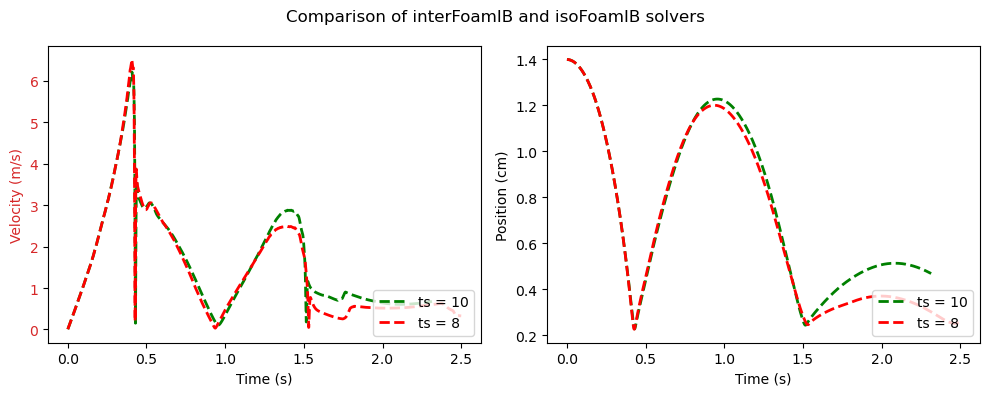

In [13]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Comparison of interFoamIB and isoFoamIB solvers')

ax1.plot(par2vel_interFoam[:,0][:], np.sqrt(par2vel_interFoam[:, 1]**2 + par2vel_interFoam[:, 2]**2 + par2vel_interFoam[:, 3]**2)[:], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax1.plot(par2vel_isoFoam[:,0][:], np.sqrt(par2vel_isoFoam[:, 1]**2 + par2vel_isoFoam[:, 2]**2 + par2vel_isoFoam[:, 3]**2)[:], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax1.set_xlabel('Time (s)')
#ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower right')



ax2.plot(par2_interFoam[:, 0][:],par2_interFoam[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax2.plot(par2_isoFoam[:, 0][:],par2_isoFoam[:, 3][:], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')
#ax2.set_xlim([0, 0.3])
#ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.legend(loc='lower right')
#fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

verification:
- single falling sphere
    - &#x2705; time dependance analysis for the mesh for 24000 cells I tried dt = 0.00001, dt = 0.00005, dt = 0.0005, dt = 0.0005.

    -  &#x2705; time dependance analysis for the mesh for 192000 cells I tried dt = 0.00001, dt = 0.00005, dt = 0.0005, dt = 0.0005.

    -   &#x2705; mesh refinement I have spacial : 3000 (10 10 30), 24000 (20 20 60), 81000 (30 30 90), 192000 (40 40 120), 648000 (60 60 180), 1536000 (80 80 240)


- &#x2705; **compare IntFlowIB and InerFoamIB**


- same for falling ball into water bouncing for **IntFlowIB**
    - &#128028; time dependance analysis for the mesh for 64000 cells I tried dt = 0.00001, dt = 0.00005, dt = 0.0005, dt = 0.0005.
    - &#128028; mesh refinement I have spacial : 8000 (20 20 20), 64000 (40 40 40), 000 (60 60 60), 192000 (80 80 80)


- not bouncing in water **IntFlowIB**

    - &#128028; time dependance analysis for the mesh for 24000 cells I tried dt = 0.00001, dt = 0.00005, dt = 0.0005, dt = 0.0005.
    - &#128028; mesh refinement I have spacial : 8000 (20 20 20), 64000 (40 40 40), 000 (60 60 60), 192000 (80 80 80)

&#128064; sencitivity analysis with the height (for velocity?? C_d and compare with analytical solution and how velocity changing for difernt height) to prove that it is important factor bc of engeneering judgement. 3 simulation with 3 diff heights for unsertanty quantification.

&#128064; i calculate a percent/error and it will be my unscertanty boundaries


## sphere-clump
- single falling sphere
- same for falling ball into water bouncing 
- not bouncing in water

&#128064; for l1 substract from analytic solcution velocity

&#128064; for error calc like pi you

&#128064; known solution to math solution for semi-empirical because of numerical scheme eqn

&#128064; it will be error not absolute error